In [36]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pandas.read_csv("NYPD_Complaint_Data_Historic.csv")
type(data)

C:\Users\Kelvi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


pandas.core.frame.DataFrame

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7825499 entries, 0 to 7825498
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         int64  
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_CD              float64
 10  PD_DESC            object 
 11  CRM_ATPT_CPTD_CD   object 
 12  LAW_CAT_CD         object 
 13  BORO_NM            object 
 14  LOC_OF_OCCUR_DESC  object 
 15  PREM_TYP_DESC      object 
 16  JURIS_DESC         object 
 17  JURISDICTION_CODE  float64
 18  PARKS_NM           object 
 19  HADEVELOPT         object 
 20  HOUSING_PSA        object 
 21  X_COORD_CD         float64
 22  Y_COORD_CD         float64
 23  SUSP_AGE_GROUP     object 
 24  SUSP_RACE          object 
 25  SUSP_SEX          

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,7.825499e+06,7.823333e+06,7.825499e+06,7.818738e+06,7.818738e+06,7.808160e+06,7.808160e+06,172475.000000,7.808160e+06,7.808160e+06
mean,5.500321e+08,6.334306e+01,2.968756e+02,4.126822e+02,7.088369e-01,1.004886e+06,2.071330e+05,13.605833,4.073517e+01,-7.392551e+01
std,2.597822e+08,3.450825e+01,1.511127e+02,2.176568e+02,6.648380e+00,2.169996e+04,3.139557e+04,12.475836,8.609054e-02,7.825796e-02
min,1.000001e+08,1.000000e+00,1.010000e+02,1.000000e+02,0.000000e+00,1.110000e+02,1.110000e+02,1.000000,4.011271e+01,-7.751921e+01
25%,3.250977e+08,4.000000e+01,1.170000e+02,2.540000e+02,0.000000e+00,9.917690e+05,1.844240e+05,3.000000,4.067280e+01,-7.397287e+01
50%,5.500406e+08,6.300000e+01,3.410000e+02,3.800000e+02,0.000000e+00,1.004419e+06,2.061090e+05,11.000000,4.073236e+01,-7.392721e+01
75%,7.750019e+08,9.400000e+01,3.510000e+02,6.370000e+02,0.000000e+00,1.016689e+06,2.351720e+05,30.000000,4.081215e+01,-7.388291e+01
max,9.999999e+08,1.230000e+02,8.810000e+02,9.750000e+02,9.700000e+01,1.067298e+06,7.250292e+06,34.000000,5.965727e+01,-7.368479e+01


In [6]:
def make_categorical(dataframe, column):
    # make the column of the dataframe categorical
    dataframe[column] = dataframe[column].astype('category')

# get a lst of all the columns in the dataframe
columns = ['ADDR_PCT_CD', 'BORO_NM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT', 'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD', 'PD_DESC', 'RPT_DT', 'STATION_NAME','SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_RACE', 'VIC_SEX']

    # make each column categorical
for column in columns:
    make_categorical(data, column)


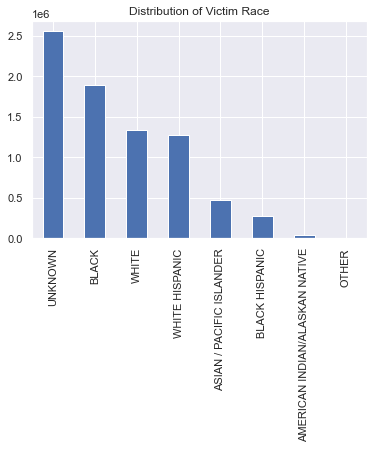

In [73]:
sns.set()
plt.title("Distribution of Victim Race")

data['VIC_RACE'].value_counts().plot(kind = 'bar')

F    3068309
M    2593114
E    1188435
D     975329
U          4
Name: VIC_SEX, dtype: int64

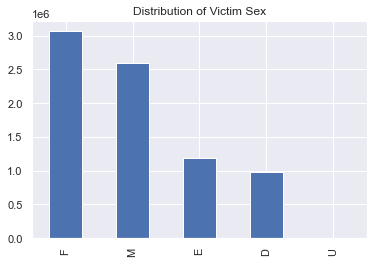

In [51]:
sns.set()
plt.title("Distribution of Victim Sex")

data['VIC_SEX'].value_counts().plot(kind = 'bar')

data['VIC_SEX'].value_counts()

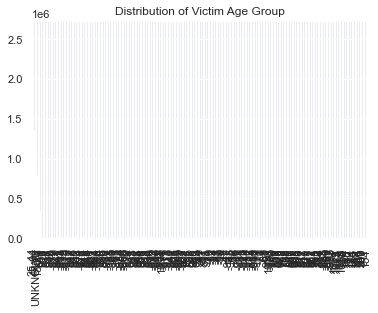

In [52]:
sns.set()
plt.title("Distribution of Victim Age Group")

data['VIC_AGE_GROUP'].value_counts().plot(kind = 'bar')

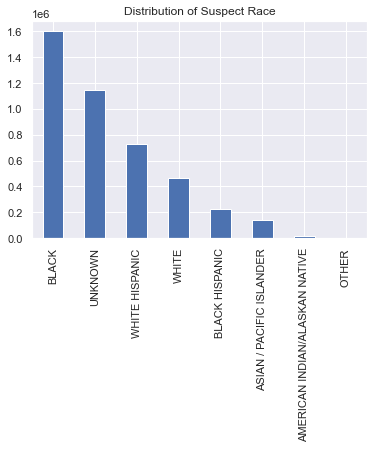

In [49]:
sns.set()
plt.title("Distribution of Suspect Race")

data['SUSP_RACE'].value_counts().plot(kind = 'bar')

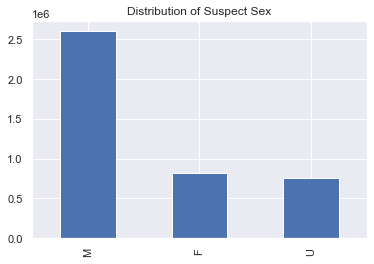

In [50]:
sns.set()
plt.title("Distribution of Suspect Sex")

data['SUSP_SEX'].value_counts().plot(kind = 'bar')

In [52]:
def new_age_VIC(row):
    if row['VIC_AGE_GROUP'] == '25-44':
        return '10000'
    elif row['VIC_AGE_GROUP'] == '45-64':
        return '20000'
    elif row['VIC_AGE_GROUP'] == '18-24':
        return '30000' 
    elif row['VIC_AGE_GROUP'] == '<18':
        return '40000'
    elif row['VIC_AGE_GROUP'] == 'UNKNOWN':
        return '50000'
    elif row['VIC_AGE_GROUP'] == '65+':
        return '60000'
    else: 
        return row['VIC_AGE_GROUP']

data['VIC_AGE_GROUP_NEW'] = data.apply(new_age_VIC, axis=1)   
print(data)

         CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0         506547392   03/29/2018     20:30:00          NaN          NaN   
1         629632833   02/06/2018     23:15:00          NaN          NaN   
2         787203902   11/21/2018     00:15:00   11/21/2018     00:20:00   
3         280364018   06/09/2018     21:42:00   06/09/2018     21:43:00   
4         985800320   11/10/2018     19:40:00   11/10/2018     19:45:00   
...             ...          ...          ...          ...          ...   
7825494   104527061   05/01/2008     18:55:00   05/01/2018     19:00:00   
7825495   284201488   05/18/2018     14:50:00   05/18/2018     14:55:00   
7825496   808565901   11/19/2018     02:25:00   11/19/2018     02:30:00   
7825497   649441648   02/03/2018     10:02:00   02/03/2018     12:15:00   
7825498   803166404   01/05/2018     14:40:00   01/05/2018     16:00:00   

         ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  \
0               32.0  03

In [53]:
data['VIC_AGE_GROUP_NEW'] = data['VIC_AGE_GROUP_NEW'].fillna('50000')

In [55]:
data['VIC_AGE_GROUP_NEW'] = data['VIC_AGE_GROUP_NEW'].astype(int)

In [71]:
def new_age_group_VIC(row):
    if (row['VIC_AGE_GROUP_NEW'] == 10000):
        return '25-44'
    elif ((row['VIC_AGE_GROUP_NEW'] >= 25) and (row['VIC_AGE_GROUP_NEW'] <= 44)):
        return '25-44'
    elif (row['VIC_AGE_GROUP_NEW'] == 20000):
        return '45-64'
    elif ((row['VIC_AGE_GROUP_NEW'] >= 45) and (row['VIC_AGE_GROUP_NEW'] <= 64)):
        return '45-64'
    elif row['VIC_AGE_GROUP_NEW'] == 30000:
        return '18-24' 
    elif ((row['VIC_AGE_GROUP_NEW'] >= 18) and (row['VIC_AGE_GROUP_NEW'] <= 24)):
        return '18-24' 
    elif row['VIC_AGE_GROUP_NEW'] == 40000:
        return '<18'
    elif ((row['VIC_AGE_GROUP_NEW'] >= 0) and (row['VIC_AGE_GROUP_NEW'] <= 18)):
        return '<18'
    elif row['VIC_AGE_GROUP_NEW'] == 50000:
        return 'UNKNOWN'
    elif ((row['VIC_AGE_GROUP_NEW'] > 100) and (row['VIC_AGE_GROUP_NEW'] < 0)):
        return 'UNKNOWN'
    elif row['VIC_AGE_GROUP_NEW'] == 60000 or ((row['VIC_AGE_GROUP_NEW'] >= 65) and (row['VIC_AGE_GROUP_NEW'] <= 100)):
        return '65+'
    elif ((row['VIC_AGE_GROUP_NEW'] >= 65) and (row['VIC_AGE_GROUP_NEW'] <= 100)):
        return '65+'

data['VIC_AGE_GROUPING'] = data.apply(new_age_group_VIC, axis=1)   
print(data)

         CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0         506547392   03/29/2018     20:30:00          NaN          NaN   
1         629632833   02/06/2018     23:15:00          NaN          NaN   
2         787203902   11/21/2018     00:15:00   11/21/2018     00:20:00   
3         280364018   06/09/2018     21:42:00   06/09/2018     21:43:00   
4         985800320   11/10/2018     19:40:00   11/10/2018     19:45:00   
...             ...          ...          ...          ...          ...   
7825494   104527061   05/01/2008     18:55:00   05/01/2018     19:00:00   
7825495   284201488   05/18/2018     14:50:00   05/18/2018     14:55:00   
7825496   808565901   11/19/2018     02:25:00   11/19/2018     02:30:00   
7825497   649441648   02/03/2018     10:02:00   02/03/2018     12:15:00   
7825498   803166404   01/05/2018     14:40:00   01/05/2018     16:00:00   

         ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  \
0               32.0  03

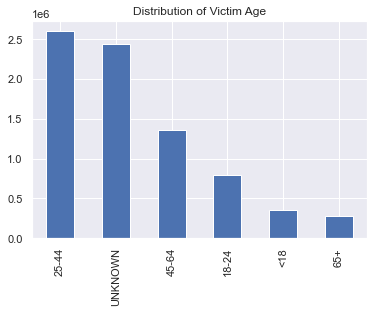

In [74]:
sns.set()
plt.title("Distribution of Victim Age")

data['VIC_AGE_GROUPING'].value_counts().plot(kind = 'bar')

In [ ]:
import pickle

with open('data_age_cleaned.pickle', 'wb') as f:
    pickle.dump(data, f)